**Aim**

The Aim of this task is to clean the data, remove rows with incomplete information, and perform basic exploratory data analysis.

**Objectives**

1. to remove incomplete and duplicated row
2. assess relationsjip between mortality outcome and selected characteristics of participants

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [171]:
df=pd.read_excel("/content/Clinicopathologic.xlsx")

In [172]:
df.head()

,Patients ID,Age of diagnosis,Gender,Ethnicity,Residential Area,Symptoms at presentation,Duration of synptoms before diagnosis,Tumour location,Unnamed: 8,Histological type,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,505888,90,Female,Yoruba,Urban,Abdominal Pain,more than 6 months,Colon,NaN,Carcinoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,505890,68,Female,Igbo,Rural,change in bowel habits,more than 6 months,rectum,NaN,Adenocarcinoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,499005,71,Male,Yoruba,Rural,Weight loss,more than 6 months,Colon,NaN,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,499329,45,Male,Yoruba,Rural,Abdominal Pain,more than 6 months,Colon,NaN,Adenocarcinoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,508596,60,Male,Yoruba,Rural,change in bowel habits,1-3 months,Colon,NaN,Adenocarcinoma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
df.shape

(150, 72)

In [174]:
df.columns

Index(['Patients ID', 'Age of diagnosis', 'Gender', 'Ethnicity',
       'Residential Area', 'Symptoms at presentation',
       'Duration of synptoms before diagnosis', 'Tumour location',
       'Unnamed: 8', 'Histological type', 'Grade of tumour',
       'Treatment modality used', 'Unnamed: 12', 'Chemotherapy Regimen',
       'Response to treatment', 'Follow-up duration', 'Survival Status',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
   

In [175]:
df=df[['Patients ID', 'Age of diagnosis', 'Gender', 'Ethnicity', 'Residential Area', 'Symptoms at presentation', 'Duration of synptoms before diagnosis', 'Tumour location',
     'Histological type', 'Grade of tumour','Treatment modality used','Treatment modality used', 'Chemotherapy Regimen',
       'Response to treatment', 'Follow-up duration', 'Survival Status']]
df.head()

,Patients ID,Age of diagnosis,Gender,Ethnicity,Residential Area,Symptoms at presentation,Duration of synptoms before diagnosis,Tumour location,Histological type,Grade of tumour,Treatment modality used,Treatment modality used,Chemotherapy Regimen,Response to treatment,Follow-up duration,Survival Status
0,505888,90,Female,Yoruba,Urban,Abdominal Pain,more than 6 months,Colon,Carcinoma,moderately differentiated,No treatment,No treatment,none,unknown,no follow-up,Dead
1,505890,68,Female,Igbo,Rural,change in bowel habits,more than 6 months,rectum,Adenocarcinoma,well-differentiated,Chemotherapy and radiotherapy,Chemotherapy and radiotherapy,others,Partial,1-3 years,Alive
2,499005,71,Male,Yoruba,Rural,Weight loss,more than 6 months,Colon,Others,NaN,NaN,NaN,NaN,unknown,NaN,Alive
3,499329,45,Male,Yoruba,Rural,Abdominal Pain,more than 6 months,Colon,Adenocarcinoma,well-differentiated,Chemotherapy,Chemotherapy,others,unknown,NaN,Alive
4,508596,60,Male,Yoruba,Rural,change in bowel habits,1-3 months,Colon,Adenocarcinoma,well-differentiated,Chemotherapy,Chemotherapy,FOLFOX,Partial,1 years,Alive


In [176]:
df.shape

(150, 16)

In [177]:
df.isnull().sum()

,0
Patients ID,0
Age of diagnosis,0
Gender,0
Ethnicity,1
Residential Area,0
Symptoms at presentation,1
Duration of synptoms before diagnosis,3
Tumour location,0
Histological type,2
Grade of tumour,5


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Patients ID                            150 non-null    object
 1   Age of diagnosis                       150 non-null    int64 
 2   Gender                                 150 non-null    object
 3   Ethnicity                              149 non-null    object
 4   Residential Area                       150 non-null    object
 5   Symptoms at presentation               149 non-null    object
 6   Duration of synptoms before diagnosis  147 non-null    object
 7   Tumour location                        150 non-null    object
 8   Histological type                      148 non-null    object
 9   Grade of tumour                        145 non-null    object
 10  Treatment modality used                140 non-null    object
 11  Treatment modality 

In [179]:
df.describe(include="object")

,Patients ID,Gender,Ethnicity,Residential Area,Symptoms at presentation,Duration of synptoms before diagnosis,Tumour location,Histological type,Grade of tumour,Treatment modality used,Treatment modality used,Chemotherapy Regimen,Response to treatment,Follow-up duration,Survival Status
count,150,150,149,150,149,147,150,148,145,140,140,143,146,135,147
unique,138,2,3,4,5,4,2,7,7,13,13,4,6,9,3
top,344505,Male,Yoruba,Rural,Weight loss,more than 6 months,Colon,Adenocarcinoma,well-differentiated,Chemotherapy,Chemotherapy,others,unknown,1 years,Alive
freq,2,83,111,74,52,121,114,105,83,75,75,130,106,82,134


In [180]:
df["Gender"].value_counts()

,count
Gender,
Male,83
Female,67


In [181]:
df.columns

Index(['Patients ID', 'Age of diagnosis', 'Gender', 'Ethnicity',
       'Residential Area', 'Symptoms at presentation',
       'Duration of synptoms before diagnosis', 'Tumour location',
       'Histological type', 'Grade of tumour', 'Treatment modality used',
       'Treatment modality used', 'Chemotherapy Regimen',
       'Response to treatment', 'Follow-up duration', 'Survival Status'],
      dtype='object')

In [182]:
df["Residential Area"].value_counts()

,count
Residential Area,
Rural,74
Male,30
Female,27
Urban,19


In [183]:
df.duplicated().sum()

0

In [184]:
df = df[df['Residential Area'] != 'Female']

In [185]:
df["Residential Area"].value_counts()

,count
Residential Area,
Rural,74
Male,30
Urban,19


In [186]:
df = df[df['Residential Area'] != 'Male']

In [187]:
df["Residential Area"].value_counts()

,count
Residential Area,
Rural,74
Urban,19


In [188]:
df.shape

(93, 16)

In [189]:
df.isnull().sum()

,0
Patients ID,0
Age of diagnosis,0
Gender,0
Ethnicity,1
Residential Area,0
Symptoms at presentation,1
Duration of synptoms before diagnosis,3
Tumour location,0
Histological type,2
Grade of tumour,5


In [190]:
df.dropna()

,Patients ID,Age of diagnosis,Gender,Ethnicity,Residential Area,Symptoms at presentation,Duration of synptoms before diagnosis,Tumour location,Histological type,Grade of tumour,Treatment modality used,Treatment modality used,Chemotherapy Regimen,Response to treatment,Follow-up duration,Survival Status
0,505888,90,Female,Yoruba,Urban,Abdominal Pain,more than 6 months,Colon,Carcinoma,moderately differentiated,No treatment,No treatment,none,unknown,no follow-up,Dead
1,505890,68,Female,Igbo,Rural,change in bowel habits,more than 6 months,rectum,Adenocarcinoma,well-differentiated,Chemotherapy and radiotherapy,Chemotherapy and radiotherapy,others,Partial,1-3 years,Alive
4,508596,60,Male,Yoruba,Rural,change in bowel habits,1-3 months,Colon,Adenocarcinoma,well-differentiated,Chemotherapy,Chemotherapy,FOLFOX,Partial,1 years,Alive
5,502489,59,Male,Igbo,Urban,change in bowel habits,less than 1 month,rectum,Mucinous Adenocarcinoma,well-differentiated,Chemotherapy,Chemotherapy,FOLFOX,Full,1 years,Alive
8,507245,44,Female,Yoruba,Rural,Abdominal Pain,more than 6 months,Colon,Adenocarcinoma,Poorly differentuated,Chemotherapy,Chemotherapy,others,unknown,1 years,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,435945,56,Male,Yoruba,Rural,Abdominal Pain,more than 6 months,Colon,Adenocarcinoma,well-differentiated,"Chemotherapy, surgery","Chemotherapy, surgery",others,unknown,4 years,Alive
89,458987,57,Male,Yoruba,Rural,Weight loss,more than 6 months,Colon,Adenocarcinoma,well-differentiated,"Surgery, Chemotherapy","Surgery, Chemotherapy",others,unknown,2 years,Alive
90,449079,32,Male,Yoruba,Rural,Blood in stool,less than 1 month,Colon,Adenocarcinoma,moderately differentiated,"surgry, Chemotherapy","surgry, Chemotherapy",FOLFOX,full,2 years,Alive
91,460153,52,Male,Yoruba,Rural,Blood in stool,1-3 months,rectum,Adenocarcinoma,well-differentiated,"Chemotherapy, Radiotherapy","Chemotherapy, Radiotherapy",others,unknown,2 years,Dead


In [191]:
df.shape

(93, 16)

In [192]:
df.isnull().sum()

,0
Patients ID,0
Age of diagnosis,0
Gender,0
Ethnicity,1
Residential Area,0
Symptoms at presentation,1
Duration of synptoms before diagnosis,3
Tumour location,0
Histological type,2
Grade of tumour,5


In [193]:
df.dropna(inplace=True)

In [194]:
df.columns

Index(['Patients ID', 'Age of diagnosis', 'Gender', 'Ethnicity',
       'Residential Area', 'Symptoms at presentation',
       'Duration of synptoms before diagnosis', 'Tumour location',
       'Histological type', 'Grade of tumour', 'Treatment modality used',
       'Treatment modality used', 'Chemotherapy Regimen',
       'Response to treatment', 'Follow-up duration', 'Survival Status'],
      dtype='object')

In [204]:
df.isnull().sum()

,0
Patient_ID,0
Age_of_diagnosis,0
Gender,0
Ethnicity,0
Residential_Area,0
Symptoms_at_presentation,0
Duration_of_symptoms_before_diagnosis,0
Tumour_location,0
Histological_type,0
Grade_of_tumour,0


In [208]:
df = df.rename(columns={'Patients ID': 'Patient_ID',
                        'Age of diagnosis': 'Age_of_diagnosis',
                        'Gender': 'Gender',
                        'Residential Area': 'Residential_Area',
                        'Symptoms at presentation': 'Symptoms_at_presentation',
                        'Duration of synptoms before diagnosis': 'Duration_of_symptoms_before_diagnosis',
                        'Tumour location': 'Tumour_location',
                        'Histological type': 'Histological_type',
                        'Grade of tumour': 'Grade_of_tumour',
                        'Follow-up duration': 'Follow_up_duration',
                        'Survival Status': 'Survival_Status'
                        })

In [196]:
df.columns

Index(['Patient_ID', 'Age_of_diagnosis', 'Gender', 'Ethnicity',
       'Residential_Area', 'Symptoms_at_presentation',
       'Duration_of_symptoms_before_diagnosis', 'Tumour_location',
       'Histological_type', 'Grade_of_tumour', 'Treatment modality used',
       'Treatment modality used', 'Chemotherapy Regimen',
       'Response to treatment', 'Follow_up_duration', 'Survival_Status'],
      dtype='object')

In [197]:
df["Survival_Status"].value_counts()

,count
Survival_Status,
Alive,71
Dead,6


In [198]:
df.shape

(77, 16)

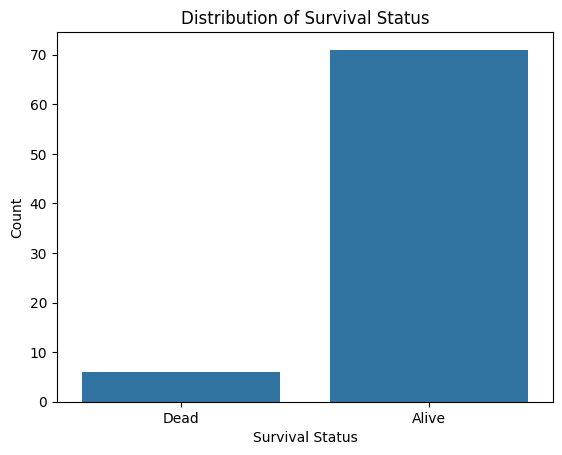

In [209]:
sns.countplot(x='Survival_Status', data=df)

plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Distribution of Survival Status")
plt.show()

In [212]:
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Patient_ID' and column != 'Treatment modality used':
        frequency_table = df[column].value_counts()
        print(f"Frequency table for {column}:\n{frequency_table}\n\n")

Frequency table for Gender:
Gender
Male      43
Female    34
Name: count, dtype: int64


Frequency table for Ethnicity:
Ethnicity
Yoruba    53
Igbo      19
Hausa      5
Name: count, dtype: int64


Frequency table for Residential_Area:
Residential_Area
Rural    61
Urban    16
Name: count, dtype: int64


Frequency table for Symptoms_at_presentation:
Symptoms_at_presentation
Abdominal Pain            26
change in bowel habits    22
Blood in stool            20
Weight loss                7
blood in stool             2
Name: count, dtype: int64


Frequency table for Duration_of_symptoms_before_diagnosis:
Duration_of_symptoms_before_diagnosis
more than 6 months    58
1-3 months            16
less than 1 month      2
3-6 months             1
Name: count, dtype: int64


Frequency table for Tumour_location:
Tumour_location
Colon     53
rectum    24
Name: count, dtype: int64


Frequency table for Histological_type:
Histological_type
Adenocarcinoma             60
Mucinous Adenocarcinoma     6
Ple

In [213]:
crosstab = pd.crosstab(df['Gender'], df['Survival_Status'])
crosstab_row_percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)
print("Crosstab:\n", crosstab)
print("\nCrosstab with Row Percentages:\n", crosstab_row_percentages)
print("\nP-value:", p_value)

Crosstab:
 Survival_Status  Alive  Dead
Gender                      
Female              32     2
Male                39     4

Crosstab with Row Percentages:
 Survival_Status      Alive      Dead
Gender                              
Female           94.117647  5.882353
Male             90.697674  9.302326

P-value: 0.8982527725868412


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 92
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Patient_ID                             77 non-null     object
 1   Age_of_diagnosis                       77 non-null     int64 
 2   Gender                                 77 non-null     object
 3   Ethnicity                              77 non-null     object
 4   Residential_Area                       77 non-null     object
 5   Symptoms_at_presentation               77 non-null     object
 6   Duration_of_symptoms_before_diagnosis  77 non-null     object
 7   Tumour_location                        77 non-null     object
 8   Histological_type                      77 non-null     object
 9   Grade_of_tumour                        77 non-null     object
 10  Treatment modality used                77 non-null     object
 11  Treatment modality used   

In [202]:
#Crosstababulation of motality outcome with other variables
import pandas as pd
import scipy.stats as stats

# Separate data by survival status
group1 = df[df['Survival_Status'] == 'Alive']['Age_of_diagnosis']
group2 = df[df['Survival_Status'] == 'Dead']['Age_of_diagnosis']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group1, group2)

# Calculate medians
median_group1 = group1.median()
median_group2 = group2.median()

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)
print("Median age at diagnosis (Alive):", median_group1)
print("Median age at diagnosis (Dead):", median_group2)

Mann-Whitney U statistic: 124.0
P-value: 0.09240691906614285
Median age at diagnosis (Alive): 51.0
Median age at diagnosis (Dead): 60.0


In [203]:
variables = ['Gender', 'Symptoms_at_presentation', 'Duration_of_symptoms_before_diagnosis', 'Tumour_location', 'Histological_type', 'Grade_of_tumour', 'Treatment modality used', 'Chemotherapy Regimen', 'Response to treatment']

for variable in variables:
  try:
    crosstab = pd.crosstab(df[variable], df['Survival_Status'])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Crosstab for Survival_Status vs {variable}:\n{crosstab}\n")
    print(f"P-value: {p_value}\n\n")
  except ValueError:
        print(f"Skipping crosstab for Survival_Status vs {variable} due to ValueError.\n\n")

Crosstab for Survival_Status vs Gender:
Survival_Status  Alive  Dead
Gender                      
Female              32     2
Male                39     4

P-value: 0.8982527725868412


Crosstab for Survival_Status vs Symptoms_at_presentation:
Survival_Status           Alive  Dead
Symptoms_at_presentation             
Abdominal Pain               25     1
Blood in stool               17     3
Weight loss                   5     2
blood in stool                2     0
change in bowel habits       22     0

P-value: 0.08302683043813577


Crosstab for Survival_Status vs Duration_of_symptoms_before_diagnosis:
Survival_Status                        Alive  Dead
Duration_of_symptoms_before_diagnosis             
1-3 months                                13     3
3-6 months                                 1     0
less than 1 month                          2     0
more than 6 months                        55     3

P-value: 0.3231814788801979


Crosstab for Survival_Status vs Tumour_location:
